In [1]:
%matplotlib inline

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# length, width, type (0, 1), will do classification
data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

mystery_data = [4.5, 1]

In [7]:
# setting all weights & biase
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

2

In [18]:
def sigmoid(val):
    return 1 / (1 + np.exp(-val))

def sigmoid_prime(val):
    return sigmoid(val) * (1 - sigmoid(val))

[2, 1, 0]
[1, 1, 0]
[3, 1.5, 1]
[3.5, 0.5, 1]
[5.5, 1, 1]
[1, 1, 0]
[3, 1, 0]
[3, 1, 0]
[1, 1, 0]
[3, 1, 0]
[2, 0.5, 0]
[2, 1, 0]
[5.5, 1, 1]
[4, 1.5, 1]
[1, 1, 0]
[3, 1, 0]
[3.5, 0.5, 1]
[3, 1.5, 1]
[5.5, 1, 1]
[3, 1.5, 1]
[3, 1, 0]
[2, 1, 0]
[3, 1.5, 1]
[3, 1.5, 1]
[3.5, 0.5, 1]
[3, 1, 0]
[5.5, 1, 1]
[4, 1.5, 1]
[1, 1, 0]
[4, 1.5, 1]
[4, 1.5, 1]
[4, 1.5, 1]
[1, 1, 0]
[5.5, 1, 1]
[4, 1.5, 1]
[2, 0.5, 0]
[5.5, 1, 1]
[3, 1.5, 1]
[3, 1, 0]
[3.5, 0.5, 1]
[5.5, 1, 1]
[3, 1, 0]
[3.5, 0.5, 1]
[3.5, 0.5, 1]
[3, 1, 0]
[2, 1, 0]
[3, 1.5, 1]
[3.5, 0.5, 1]
[5.5, 1, 1]
[2, 1, 0]
[3, 1.5, 1]
[3, 1.5, 1]
[2, 0.5, 0]
[4, 1.5, 1]
[1, 1, 0]
[5.5, 1, 1]
[2, 0.5, 0]
[3, 1.5, 1]
[5.5, 1, 1]
[2, 1, 0]
[5.5, 1, 1]
[3, 1.5, 1]
[5.5, 1, 1]
[4, 1.5, 1]
[2, 1, 0]
[4, 1.5, 1]
[4, 1.5, 1]
[3, 1.5, 1]
[5.5, 1, 1]
[3, 1.5, 1]
[2, 0.5, 0]
[2, 1, 0]
[3, 1.5, 1]
[2, 1, 0]
[5.5, 1, 1]
[3, 1, 0]
[4, 1.5, 1]
[5.5, 1, 1]
[3, 1, 0]
[3.5, 0.5, 1]
[1, 1, 0]
[2, 0.5, 0]
[3.5, 0.5, 1]
[2, 1, 0]
[3.5, 0.5, 1]
[4, 1.5, 1]
[5.5, 

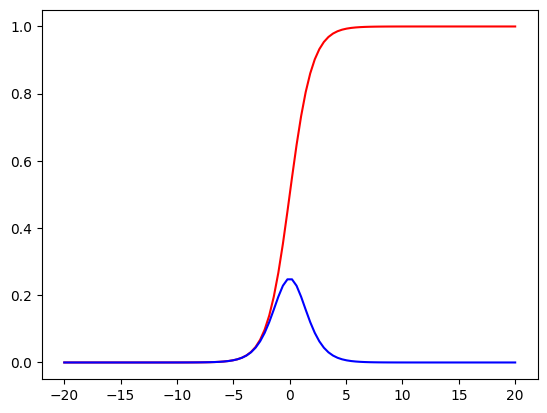

In [24]:
# Testing sigmoid and sigmoid_prime
T = np.linspace(-20,20,100)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_prime(T), c='b')

# getting random data
for i in range(100):
    ri = np.random.randint(len(data))
    print(data[ri])

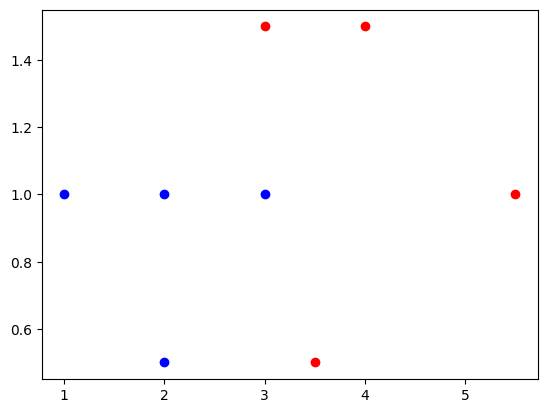

In [34]:
# scatter data

for i in range(len(data)):
    # 0 for blue(default) and 1 for red
    point = data[i] 
    color = 'r' if point[2] == 1 else 'b'
    plt.scatter(point[0], point[1], c=color)